In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set(style="ticks")

In [66]:
data = pd.read_csv("../covid-19-data/us-states.csv")
data['date'] = pd.to_datetime(data.date)
data['state'] = data.state.astype(str)
data.drop(['fips'], axis=1, inplace=True)
wiki = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0][['State','Population estimate, July 1, 2019[2]']]
wiki.columns = ['state', 'population']

data = pd.merge(data, wiki, on='state', how='inner')
data['case_pct'] = 100 * data.cases / data.population
data.set_index('date', inplace=True)

#adj_states = pd.read_table("https://introcs.cs.princeton.edu/java/data/contiguous-usa.dat", delimiter=' ', header=None, names=['st1', 'st2'])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1373 entries, 2020-01-21 to 2020-03-27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1373 non-null   object 
 1   cases       1373 non-null   int64  
 2   deaths      1373 non-null   int64  
 3   population  1373 non-null   int64  
 4   case_pct    1373 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 64.4+ KB


In [68]:
data.groupby(['state'])[['cases', 'deaths', 'case_pct']].describe()

cases                                                 \
                     count         mean           std   min    25%    50%   
state                                                                       
Alabama               15.0   175.533333    197.549945   6.0  34.00  106.0   
Alaska                16.0    23.875000     26.834990   1.0   2.50   13.0   
Arizona               62.0    43.467742    124.752702   1.0   1.00    1.0   
Arkansas              17.0   119.941176    130.910022   1.0  16.00   62.0   
California            63.0   441.476190    995.580247   1.0   6.50   11.0   
Colorado              23.0   374.304348    490.805038   2.0  25.50  161.0   
Connecticut           20.0   269.500000    383.497821   1.0   9.75   82.0   
Delaware              17.0    50.470588     53.380846   1.0   7.00   30.0   
District of Columbia  21.0    78.285714     94.374331   1.0  10.00   31.0   
Florida               27.0   524.888889    848.451365   2.0  12.50   70.0   
Georgia               26.0   378.730769    588.522323   2.0  12.50   81.0   
Guam                  12.0    18.916667     14.712137   3.0   6.75   14.5   
Hawaii                22.0    32.727273     39.793732   1.0   2.00   12.0   
Idaho                 15.0    56.333333     70.801197   1.0   7.00   31.0   
Illinois              64.0   218.953125    596.062994   1.0   2.00    2.0   
Indiana               22.0   153.636364    255.934431   1.0  11.25   27.0   
Iowa                  20.0    61.750000     64.756934   3.0  16.75   33.5   
Kansas                21.0    46.952381     60.899488   1.0   5.00   17.0   
Kentucky              22.0    67.954545     86.663266   1.0   8.00   24.0   
Louisiana             19.0   673.578947    837.782212   1.0  56.50  280.0   
Maine                 16.0    66.750000     56.915727   1.0  15.75   54.5   
Maryland              23.0   149.086957    208.739706   3.0  11.00   39.0   
Massachusetts         56.0   229.696429    601.907450   1.0   1.00    1.0   
Michigan              18.0   831.777778   1125.709792   2.0  38.00  207.0   
Minnesota             22.0   105.681818    123.926010   1.0   6.00   57.0   
Mississippi           17.0   151.764706    187.191589   1.0  10.00   50.0   
Missouri              21.0   113.857143    188.236098   1.0   2.00   16.0   
Montana               15.0    34.466667     34.694311   4.0   8.00   19.0   
Nebraska              40.0    29.700000     25.699646  10.0  13.00   15.0   
Nevada                23.0   132.347826    180.442287   2.0   5.50   45.0   
New Hampshire         26.0    41.500000     54.392095   1.0   4.00   10.0   
New Jersey            24.0  1362.166667   2365.472591   1.0  14.00  137.0   
New Mexico            17.0    55.529412     52.975369   4.0  17.00   35.0   
New York              27.0  7689.222222  13182.889491   1.0  97.50  610.0   
North Carolina        25.0   146.040000    223.827590   1.0   7.00   32.0   
North Dakota          17.0    21.235294     21.681010   1.0   1.00   19.0   
Ohio                  19.0   258.421053    337.456057   3.0  19.50   90.0   
Oklahoma              22.0    55.272727     86.099158   1.0   2.00   14.0   
Oregon                29.0    79.172414    107.438710   1.0   2.00   30.0   
Pennsylvania          22.0   384.136364    599.624986   2.0  17.50   91.0   
Puerto Rico           14.0    19.714286     19.738399   3.0   5.00   10.0   
Rhode Island          27.0    42.259259     56.418486   2.0   3.00   20.0   
South Carolina        22.0   130.954545    169.818524   2.0  10.50   40.0   
South Dakota          18.0    19.222222     15.264552   5.0   9.00   12.5   
Tennessee             23.0   239.956522    336.607605   1.0   7.50   52.0   
Texas                 45.0   197.800000    423.147975   1.0   4.00   16.0   
Utah                  32.0    79.562500    132.593470   1.0   1.00    6.0   
Vermont               21.0    40.714286     55.237798   1.0   2.00   14.0   
Virginia              21.0   146.714286    186.144337   1.0  17.00   67.0   
Washington       

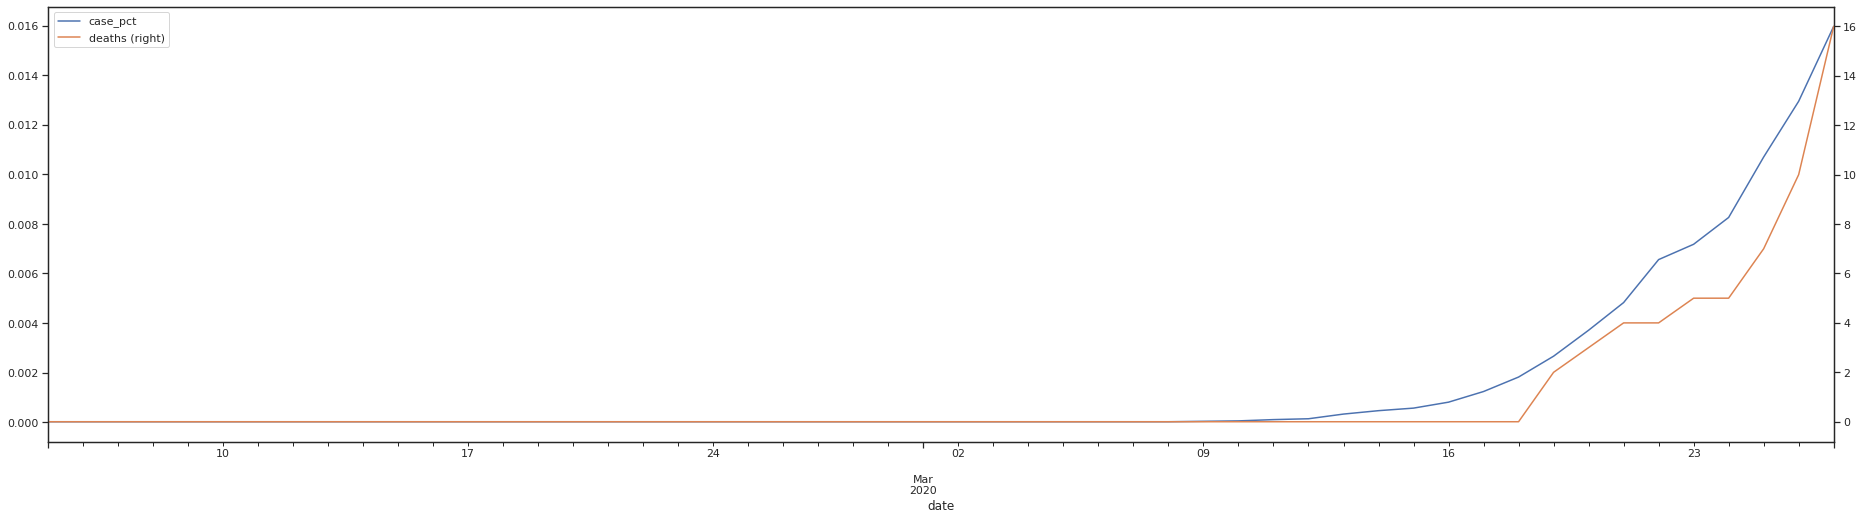

In [69]:
data.query("state=='Wisconsin'")[['case_pct', 'deaths']].plot(figsize=(32,8), secondary_y='deaths')